# Meta Kaggle Dataset Analysis - 3 - Competitions
Kaggle's public data on competitions, users, submission scores, and kernels

- https://www.kaggle.com/datasets/kaggle/meta-kaggle


In [1]:
%%html
<style type='text/css'>
.CodeMirror {
    font-size: 14px; 
    font-family: 'Droid Sans Mono';
}
</style>

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [3]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, BooleanType
from pyspark.sql.functions import *

In [6]:
spark = (SparkSession
        .builder
        .appName("meta-kaggle-data-analysis")
        .config("spark.driver.memory", "4g")
        .config("spark.executor.instances", 4)
        .config("spark.executor.memory", "1g")
        .config("spark.executor.cores", 2)
        .getOrCreate()
        )

24/03/08 20:15:30 WARN Utils: Your hostname, blue resolves to a loopback address: 127.0.1.1; using 192.168.0.41 instead (on interface wlo1)
24/03/08 20:15:30 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/03/08 20:15:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [7]:
spark

In [8]:
data_files_path = "/home/rk/Desktop/data/kaggle-meta"

****

## 5. Competitions

In [9]:
competitions_file = f"{data_files_path}/Competitions.csv"

In [10]:
competitions_schema = StructType([
    StructField("Id",IntegerType()),
    StructField("Slug",StringType()),
    StructField("Title",StringType()),
    StructField("Subtitle",StringType()),
    StructField("HostSegmentTitle",StringType()),
    StructField("ForumId",IntegerType()),
    StructField("OrganizationId",IntegerType()),
    StructField("EnabledDate",StringType()),
    StructField("DeadlineDate",StringType()),
    StructField("ProhibitNewEntrantsDeadlineDate",StringType()),
    StructField("TeamMergerDeadlineDate",StringType()),
    StructField("TeamModelDeadlineDate",StringType()),
    StructField("ModelSubmissionDeadlineDate",StringType()),
    StructField("FinalLeaderboardHasBeenVerified",BooleanType()),
    StructField("HasKernels",BooleanType()),
    StructField("OnlyAllowKernelSubmissions",BooleanType()),
    StructField("HasLeaderboard",BooleanType()),
    StructField("LeaderboardPercentage",IntegerType()),
    StructField("ScoreTruncationNumDecimals",IntegerType()),
    StructField("EvaluationAlgorithmAbbreviation",StringType()),
    StructField("EvaluationAlgorithmName",StringType()),
    StructField("EvaluationAlgorithmDescription",StringType()),
    StructField("EvaluationAlgorithmIsMax",BooleanType()),
    StructField("MaxDailySubmissions",IntegerType()),
    StructField("NumScoredSubmissions",IntegerType()),
    StructField("MaxTeamSize",IntegerType()),
    StructField("BanTeamMergers",BooleanType()),
    StructField("EnableTeamModels",BooleanType()),
    StructField("RewardType",StringType()),
    StructField("RewardQuantity",IntegerType()),
    StructField("NumPrizes",IntegerType()),
    StructField("UserRankMultiplier",IntegerType()),
    StructField("CanQualifyTiers",BooleanType()),
    StructField("TotalTeams",IntegerType()),
    StructField("TotalCompetitors",IntegerType()),
    StructField("TotalSubmissions",IntegerType()),
    StructField("ValidationSetName",StringType()),
    StructField("ValidationSetValue",StringType()),
    StructField("EnableSubmissionModelHashes",BooleanType()),
    StructField("EnableSubmissionModelAttachments",BooleanType()),
    StructField("HostName",StringType()),
    StructField("CompetitionTypeId",IntegerType()),
])

24/03/08 20:15:43 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [11]:
competitions = spark.read.csv(competitions_file, header=True, schema=competitions_schema)
competitions.createOrReplaceTempView("competitions")

competitions.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- Slug: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Subtitle: string (nullable = true)
 |-- HostSegmentTitle: string (nullable = true)
 |-- ForumId: integer (nullable = true)
 |-- OrganizationId: integer (nullable = true)
 |-- EnabledDate: string (nullable = true)
 |-- DeadlineDate: string (nullable = true)
 |-- ProhibitNewEntrantsDeadlineDate: string (nullable = true)
 |-- TeamMergerDeadlineDate: string (nullable = true)
 |-- TeamModelDeadlineDate: string (nullable = true)
 |-- ModelSubmissionDeadlineDate: string (nullable = true)
 |-- FinalLeaderboardHasBeenVerified: boolean (nullable = true)
 |-- HasKernels: boolean (nullable = true)
 |-- OnlyAllowKernelSubmissions: boolean (nullable = true)
 |-- HasLeaderboard: boolean (nullable = true)
 |-- LeaderboardPercentage: integer (nullable = true)
 |-- ScoreTruncationNumDecimals: integer (nullable = true)
 |-- EvaluationAlgorithmAbbreviation: string (nullable = true)
 |-- Ev

24/03/08 20:15:48 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [12]:
competitions.limit(1).toPandas()

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate,FinalLeaderboardHasBeenVerified,HasKernels,OnlyAllowKernelSubmissions,HasLeaderboard,LeaderboardPercentage,ScoreTruncationNumDecimals,EvaluationAlgorithmAbbreviation,EvaluationAlgorithmName,EvaluationAlgorithmDescription,EvaluationAlgorithmIsMax,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId
0,2408,Eurovision2010,Forecast Eurovision Voting,"This competition requires contestants to forecast the voting for this year's Eurovision Song Contest in Norway on May 25th, 27th and 29th.",Featured,2,NaN,04/07/2010 07:57:43,05/25/2010 18:00:00,None,None,None,None,True,True,False,False,10,5,AE,Absolute Error,Sum of absolute values of all errors.,False,5,5,20,False,False,USD,NaN,1,1,False,22,25,22,None,None,False,False,None,1


In [13]:
spark.sql("SELECT COUNT(*) FROM competitions").toPandas()

,count(1)
0,5666


In [14]:
competition_summary = spark.sql("""
WITH temp AS (
SELECT
    Id
  , Slug
  , Title
  , Subtitle
  , HostSegmentTitle
  , ForumId
  , OrganizationId
  , CASE
      WHEN LENGTH(EnabledDate) >= 10 AND 
           regexp_extract(EnabledDate, r"(\d{2}/\d{2}/\d{4})", 1) != "" AND
           regexp_extract(EnabledDate, r"(\d{2}/\d{2}/\d{4})", 1) IS NOT NULL THEN
          to_date(SUBSTR(EnabledDate, 1, 10), "MM/dd/yyyy")
      ELSE
          '2010-01-01'
    END AS EnabledDate
  , HasKernels
  , EvaluationAlgorithmName
  , EvaluationAlgorithmDescription
  , RewardType
  , RewardQuantity
  , TotalTeams
  , TotalCompetitors
  , TotalSubmissions
  , ValidationSetName
  , ValidationSetValue
  , HostName
  , CompetitionTypeId
FROM
    competitions
)
SELECT
    YEAR(EnabledDate)                                    AS competition_year
  , date(EnabledDate)                                    AS EnabledDate
  , CONCAT("https://www.kaggle.com/competitions/", Slug) AS competition_url
  , Title
  , Subtitle
  , HostSegmentTitle
  , Id
  , Slug
  , ForumId
  , OrganizationId
  , HasKernels
  , EvaluationAlgorithmName
  , EvaluationAlgorithmDescription
  , RewardType
  , RewardQuantity
  , TotalTeams
  , TotalCompetitors
  , TotalSubmissions
  , ValidationSetName
  , ValidationSetValue
  , HostName
  , CompetitionTypeId  
FROM
    temp
ORDER BY
    date(EnabledDate) DESC
""")

competition_summary.createOrReplaceTempView("competition_summary")
spark.sql("SELECT * FROM competition_summary ORDER BY EnabledDate DESC LIMIT 10").toPandas()

,competition_year,EnabledDate,competition_url,Title,Subtitle,HostSegmentTitle,Id,Slug,ForumId,OrganizationId,HasKernels,EvaluationAlgorithmName,EvaluationAlgorithmDescription,RewardType,RewardQuantity,TotalTeams,TotalCompetitors,TotalSubmissions,ValidationSetName,ValidationSetValue,HostName,CompetitionTypeId
0,2024,2024-02-01,https://www.kaggle.com/competitions/playground-series-s4e2,Multi-Class Prediction of Obesity Risk,"Playground Series - Season 4, Episode 2",Playground,68479,playground-series-s4e2,4458723,4.0,True,Accuracy Score,Accuracy classification score. See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html,Swag,NaN,3587,3746,29669,None,None,None,1
1,2024,2024-01-09,https://www.kaggle.com/competitions/widsdatathon2024-challenge1,WiDS Datathon 2024 Challenge #1,Equity in Healthcare,Community,65862,widsdatathon2024-challenge1,4213195,NaN,True,Roc Auc Score,Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores. See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html,None,NaN,670,1542,22127,None,None,None,1
2,2024,2024-01-02,https://www.kaggle.com/competitions/playground-series-s4e1,Binary Classification with a Bank Churn Dataset,"Playground Series - Season 4, Episode 1",Playground,65711,playground-series-s4e1,4201582,4.0,True,Roc Auc Score,Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores. See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html,Swag,NaN,3632,3777,28457,None,None,None,1
3,2023,2023-12-19,https://www.kaggle.com/competitions/santa-2023,Santa 2023 - The Polytope Permutation Puzzle,Solve twisty puzzles in the fewest moves,Featured,65704,santa-2023,4201369,4.0,True,Santa 2023 Metric,Counts the number of moves needed to solve all of Santa's permutation puzzles.,USD,NaN,1054,1203,12069,None,None,None,1
4,2023,2023-12-05,https://www.kaggle.com/competitions/playground-series-s3e26,Multi-Class Prediction of Cirrhosis Outcomes,"Playground Series - Season 3, Episode 26",Playground,60893,playground-series-s3e26,3817327,4.0,True,Multiclass Loss,"Negative log likelihood divided by the number of observations--solution is true category label (0 to n-1), submission is columns where Jth row is pred. prob. of J. Normalizes submission rows so sum is 1.",Swag,NaN,1661,1718,15115,None,None,None,1
5,2023,2023-11-14,https://www.kaggle.com/competitions/playground-series-s3e25,Regression with a Mohs Hardness Dataset,"Playground Series - Season 3, Episode 25",Playground,60892,playground-series-s3e25,3817326,4.0,True,Median Absolute Error,Median absolute error regression loss. See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html,Swag,NaN,1632,1705,12610,None,None,None,1
6,2023,2023-11-07,https://www.kaggle.com/competitions/blood-vessel-segmentation,SenNet + HOA - Hacking the Human Vasculature in 3D,Segment vasculature in 3D scans of human kidney,Research,61446,blood-vessel-segmentation,3859014,3873.0,True,Surface Dice Metric,Surface Dice metric for 2D or 3D data.,USD,NaN,1149,1401,32391,None,None,None,1
7,2023,2023-10-31,https://www.kaggle.com/competitions/llm-detect-ai-generated-text,LLM - Detect AI Generated Text,Identify which essay was written by a large language model,Featured,61542,llm-detect-ai-generated-text,3863365,3814.0,True,Roc Auc Score,Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores. See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html,USD,NaN,4358,5264,110052,None,None,None,1
8,2023,2023-10-24,https://www.kaggle.com/competitions/playground-series-s3e24,Binary Prediction of Smoker Status using Bio-Signals,"Playground Series - Season 3, Episode 24",Playground,60891,playground-series-s3e24,3817325,4.0,True,Roc Auc Score,Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction s

In [15]:
out_file = f"{data_files_path}/formatted/Competitions_fmt.csv"
competition_summary.orderBy('EnabledDate', ascending=False).toPandas().to_csv(out_file, index=False)

### Competitions per year

In [16]:
df = spark.sql("""
SELECT
    competition_year
  , COUNT(*) AS count
FROM
    competition_summary
GROUP BY
    competition_year
ORDER BY
    competition_year
""").toPandas()

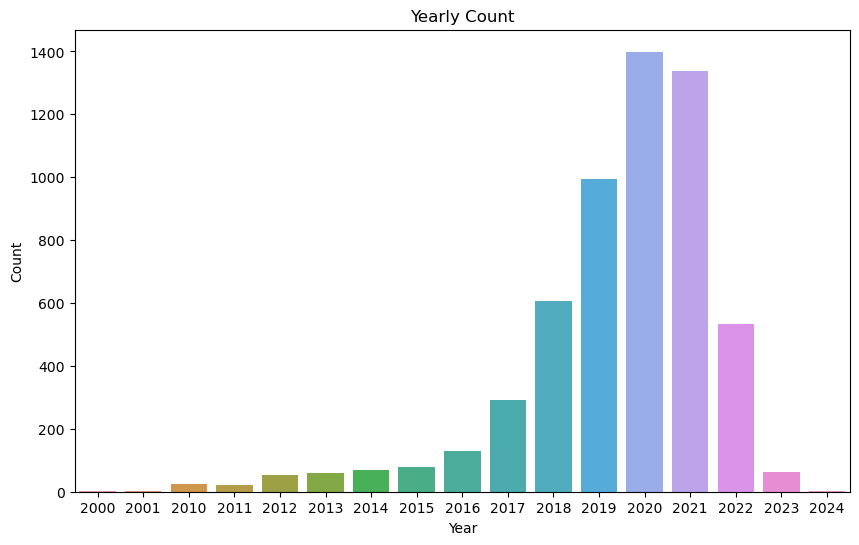

In [17]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='competition_year', y='count', data=df)
plt.title('Yearly Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

****

### Submissions

In [18]:
spark.sql("""
SELECT
    Id
  , Title
  , MaxDailySubmissions
  , NumScoredSubmissions
  , MaxTeamSize
  , BanTeamMergers
  , EnableTeamModels
  , RewardType
  , NVL(RewardQuantity, 0) AS RewardQuantity
  , NumPrizes
  , UserRankMultiplier
  , CanQualifyTiers
  , TotalTeams
  , TotalCompetitors
  , TotalSubmissions
FROM
    competitions
LIMIT 5
""").toPandas()

,Id,Title,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
0,2408,Forecast Eurovision Voting,5,5,20,False,False,USD,0,1,1.0,False,22,25,22
1,2435,Predict HIV Progression,4,4,20,False,False,USD,0,1,1.0,True,107,116,855
2,2438,World Cup 2010 - Take on the Quants,5,5,20,False,False,USD,0,1,NaN,False,0,0,0
3,2439,INFORMS Data Mining Contest 2010,5,5,20,False,False,USD,0,1,1.0,True,145,153,1483
4,2442,World Cup 2010 - Confidence Challenge,5,5,20,False,False,USD,0,1,NaN,False,63,64,63


### Top 5 competitions based on Total competitors

In [19]:
spark.sql("""
SELECT
    Id
  , Title
  , Slug
  , Subtitle
  , MaxDailySubmissions
  , NumScoredSubmissions
  , MaxTeamSize
  , BanTeamMergers
  , EnableTeamModels
  , RewardType
  , NVL(RewardQuantity, 0) AS RewardQuantity
  , NumPrizes
  , UserRankMultiplier
  , CanQualifyTiers
  , TotalTeams
  , TotalCompetitors
  , TotalSubmissions
FROM
    competitions
ORDER BY
    TotalCompetitors DESC
LIMIT 5
""").toPandas()

,Id,Title,Slug,Subtitle,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
0,10385,Santander Customer Transaction Prediction,santander-customer-transaction-prediction,Can you identify who will make a transaction?,3,2,5,False,True,USD,0,5,1,True,8751,9787,104129
1,9120,Home Credit Default Risk,home-credit-default-risk,Can you predict how capable each applicant is of repaying a loan?,5,2,20,False,True,USD,0,3,1,True,7176,8373,131888
2,14242,IEEE-CIS Fraud Detection,ieee-fraud-detection,Can you detect fraud from customer transactions?,5,2,5,False,True,USD,0,3,1,True,6351,7389,125219
3,52784,ICR - Identifying Age-Related Conditions,icr-identify-age-related-conditions,Use Machine Learning to detect conditions with measurements of anonymous characteristics,1,2,5,False,True,USD,0,6,1,True,6430,7327,57333
4,18599,M5 Forecasting - Accuracy,m5-forecasting-accuracy,Estimate the unit sales of Walmart retail goods,5,1,5,False,True,USD,0,5,1,True,5558,7022,88741


### Competition that received max submissions

In [20]:
spark.sql("""
SELECT
    *
FROM
    competitions 
ORDER BY TotalSubmissions DESC
LIMIT 3
""").toPandas()

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate,FinalLeaderboardHasBeenVerified,HasKernels,OnlyAllowKernelSubmissions,HasLeaderboard,LeaderboardPercentage,ScoreTruncationNumDecimals,EvaluationAlgorithmAbbreviation,EvaluationAlgorithmName,EvaluationAlgorithmDescription,EvaluationAlgorithmIsMax,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId
0,9120,home-credit-default-risk,Home Credit Default Risk,Can you predict how capable each applicant is of repaying a loan?,Featured,35355,1536,05/17/2018 22:56:29,08/29/2018 23:59:00,08/22/2018 23:59:00,08/22/2018 23:59:00,09/14/2018 23:59:00,None,True,True,False,True,20,5,AUC,Area Under Receiver Operating Characteristic Curve,"Measures discrimination. Calculates how well an algorithm separates true positives from false positives. Overall good metric for classification problems. Has range [0.5, 1.0]",True,5,2,20,False,True,USD,NaN,3,1,True,7176,8373,131888,None,None,False,False,None,1
1,14242,ieee-fraud-detection,IEEE-CIS Fraud Detection,Can you detect fraud from customer transactions?,Research,275877,3016,07/15/2019 20:47:11,10/03/2019 23:59:00,10/03/2019 23:59:00,09/24/2019 23:59:00,10/26/2019 00:00:00,None,True,True,False,True,20,6,AUC,Area Under Receiver Operating Characteristic Curve,"Measures discrimination. Calculates how well an algorithm separates true positives from false positives. Overall good metric for classification problems. Has range [0.5, 1.0]",True,5,2,5,False,True,USD,NaN,3,1,True,6351,7389,125219,None,None,False,False,None,1
2,61542,llm-detect-ai-generated-text,LLM - Detect AI Generated Text,Identify which essay was written by a large language model,Featured,3863365,3814,10/31/2023 17:55:41,01/22/2024 23:59:00,01/15/2024 23:59:00,01/15/2024 23:59:00,03/31/2024 00:00:00,None,True,True,True,True,46,6,39244492,Roc Auc Score,Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores. See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html,True,5,3,5,False,True,USD,NaN,7,1,True,4358,5264,110052,None,None,False,False,None,1


### All competitions

In [21]:
spark.sql("""
SELECT
    Title
  , Subtitle
FROM
    competitions
ORDER BY
    Title
""").toPandas()

,Title,Subtitle
0,"""""""Clever"""" questions classification""",The challenge is distinguish questions prepared by professional authors from questions suggested by game users.
1,"""""""Сириус""""","зима 2019"""
2,"""2021 Academic Competition """"Uplift Modeling""""""",Rank clients according to their purchasing responsiveness to communication
3,"""STAT6031 """"Crime"""" Project""",Course Project in Fall 2019
4,"""SejongAI.텀프로젝트.[""""범죄유형예측""""]""",세종대학교 인공지능 텀 프로젝트 [18011863]_[최영민]
5,"""Узнай героев сериала """"Друзья"""" с первых слов""","""В задании необходимо научиться предсказывать, кому из 6 главных героев сериала """"Друзья"""" принадлежит реплика."""
6,"""אכ""""אתון""",חיזוי נשר מיטב
7,"""אכ""""אתון""",חיזוי נשר מיטב
8,#HomeAlone2020,Welcome all for #homeAlone2020 kaggle competiton.
9,#HomeAlone2020,Welcome all for #homeAlone2020 kaggle competiton.


In [22]:
spark.stop()